In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('HousingPrice.csv')

In [3]:
data.head()

,title,price,area,price_per_sqft,locality,city,property_type,bedroom_num,bathroom_num,balcony_num,furnished,age,total_floors,latitude,longitude
0,Octave Parijas Horizon,6600283,757,8719.000000,Kalyan,Mumbai,Apartment,2,2,0,Unfurnished,0,1,19.244410,73.123253
1,Shakti Siyara Heights,6169841,652,9462.946319,Kalyan,Mumbai,Apartment,2,2,0,Unfurnished,0,1,19.257294,73.148872
2,Bhagwati Bhagwati Celeste,4599936,396,11616.000000,Dombivali,Mumbai,Apartment,1,1,0,Unfurnished,0,1,19.209026,73.081276
3,Relcon Ridhi Sidhi Sadan Of Ridhi Sidhi Co Ope...,51980000,1130,46000.000000,Ville Parle,Mumbai,Apartment,3,3,0,Unfurnished,0,1,19.097841,72.851158
4,J P Ruchita Bliss,3915000,435,9000.000000,Nala Sopara,Mumbai,Apartment,1,1,0,Unfurnished,0,1,19.420601,72.809319


In [4]:
data['city'].value_counts()

city
Mumbai            70882
Western Mumbai      489
Central Mumbai      362
Mumbai South        205
Name: count, dtype: int64

In [5]:
data = data.join(pd.get_dummies(data.city).astype('int')).drop('city', axis=1)

In [6]:
data.head(2)

,title,price,area,price_per_sqft,locality,property_type,bedroom_num,bathroom_num,balcony_num,furnished,age,total_floors,latitude,longitude,Central Mumbai,Mumbai,Mumbai South,Western Mumbai
0,Octave Parijas Horizon,6600283,757,8719.000000,Kalyan,Apartment,2,2,0,Unfurnished,0,1,19.244410,73.123253,0,1,0,0
1,Shakti Siyara Heights,6169841,652,9462.946319,Kalyan,Apartment,2,2,0,Unfurnished,0,1,19.257294,73.148872,0,1,0,0


In [7]:
data = data.drop(['title', 'locality', 'property_type'], axis=1)

In [8]:
data['furnished'].value_counts()

furnished
Unfurnished       49917
Semi-Furnished    17056
Furnished          4965
Name: count, dtype: int64

In [9]:
data = data.join(pd.get_dummies(data.furnished).astype('int')).drop('furnished', axis=1)

In [10]:
data.head(2)

,price,area,price_per_sqft,bedroom_num,bathroom_num,balcony_num,age,total_floors,latitude,longitude,Central Mumbai,Mumbai,Mumbai South,Western Mumbai,Furnished,Semi-Furnished,Unfurnished
0,6600283,757,8719.000000,2,2,0,0,1,19.244410,73.123253,0,1,0,0,0,0,1
1,6169841,652,9462.946319,2,2,0,0,1,19.257294,73.148872,0,1,0,0,0,0,1


<Axes: >

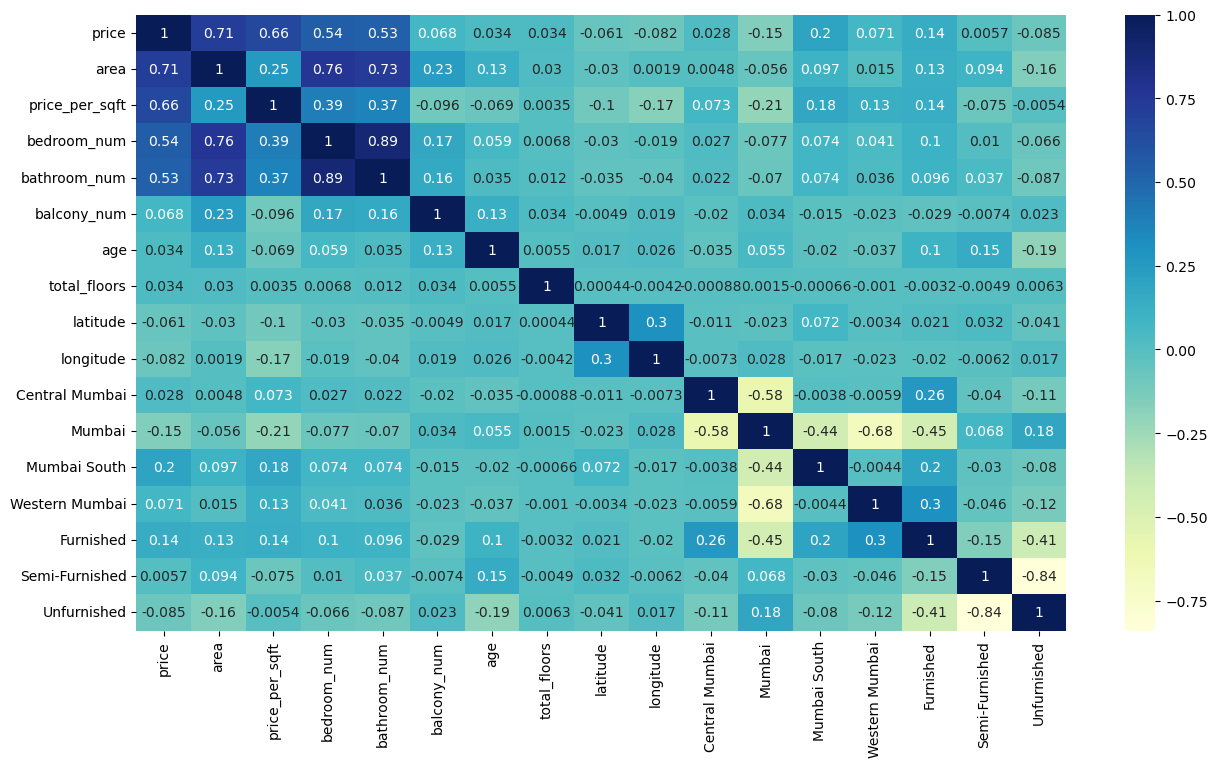

In [11]:
plt.figure(figsize=(15, 8))
sns.heatmap(data.corr(), annot=True, cmap="YlGnBu")

<Axes: xlabel='latitude', ylabel='longitude'>

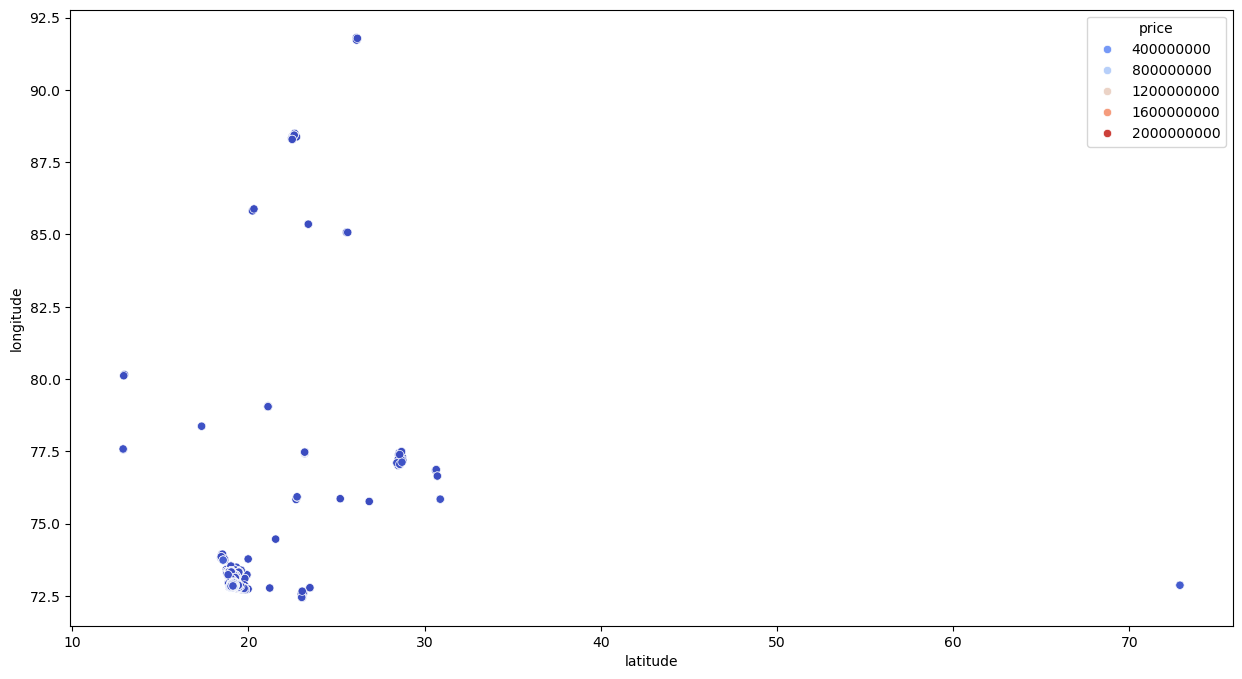

In [12]:
plt.figure(figsize=(15, 8))
sns.scatterplot(x='latitude', y='longitude', data = data, hue='price', palette='coolwarm')

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
x, y = data.drop('price', axis=1), data['price']

In [15]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [16]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

reg = LinearRegression()
scaler = StandardScaler()

x_train_s = scaler.fit_transform(x_train)
x_test_s = scaler.transform(x_test)

reg.fit(x_train_s, y_train)

LinearRegression()

In [17]:
reg.score(x_test_s, y_test)

0.7813759060572221

In [18]:
from sklearn.ensemble import RandomForestRegressor

forest = RandomForestRegressor()

forest.fit(x_train_s, y_train)

RandomForestRegressor()

In [19]:
forest.score(x_test_s, y_test)

0.995091835732242

In [20]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    "n_estimators": [120, 160, 200],
    "min_samples_split": [10, 30, 50]
}

grid_search = GridSearchCV(forest, param_grid, cv=5, n_jobs=-1, scoring="neg_mean_squared_error", return_train_score=True)

grid_search.fit(x_train_s, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'min_samples_split': [10, 30, 50],
                         'n_estimators': [120, 160, 200]},
             return_train_score=True, scoring='neg_mean_squared_error')

In [22]:
grid_search.best_estimator_.score(x_test_s, y_test)

0.9941881658433487